In [1]:
%%javascript

window.load_remote_theme = false
var theme_url = "https://drostehk.github.io/ipynb-theme/";
var asset_url = 'https://raw.githubusercontent.com/tijptjik/DS_assets/master/';

window.load_local_theme = function(){
    var hostname = document.location.hostname
    return ((hostname == "localhost" || hostname == '127.0.0.1') && !load_remote_theme)
}

var url = load_local_theme() ? document.location.origin + "/files/theme/custom.js" : theme_url + 'custom.js'

$.getScript(url)

<IPython.core.display.Javascript object>

# KNN Classification

> When you are a grown up your brothers become your neighbors and your unconditional brotherhood become your conditional neighborhood.

<footer>~ Amit Kalantri</footer>

![break](assets/agenda.png)

1. [Classification Problems](#Classification-Problems)
1. [Building Effective Classifiers](#Building-Effective-Classifiers)
1. [KNN Classification](#KNN-Classification)

**Labs**
1. [Implemeneting the KNN Classification Model](#Implementing-the-KNN-Classification)
1. Sampling Strategy for balancing your classes

![break](assets/theory.png)

## The Classic Classification

Here’s (part of) an example dataset (Fisher’s Iris Data Set)

In [2]:
import pandas as pd
from sklearn.datasets import load_iris

load_iris?

In [9]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[x] for x in iris.target]
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
print 'Independent Variables: \n%s' % iris.feature_names

Independent Variables: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print 'Class Labels: \n%s' % iris.target_names

Class Labels: 
['setosa' 'versicolor' 'virginica']


**Supervised learning** (machine learning) takes a known set of input data and known responses to the data, and seeks to build a predictor model that generates reasonable predictions for the response to new data.

![](assets/classification__mapping_task.png)

### Classification in 4 Steps 

1)  Split Dataset

![](assets/classification_step1.png)

2) Train Model

![](assets/classification_step2.png)

3) Test Model

![](assets/classification_step3.png)

4) Make Predictions

![](assets/classification_step4.png)

**This new data is called out of sample data. The labels for these Out of Sample (OOS) records are unknown**

All Together Now

![](assets/classification_steps.png)

![break](assets/theory.png)

## Building Effective Classifiers

### What types of prediction error will we run into?

1) Training Error

![](assets/classification_error_1.png)

2) Test / Generalization Error

![](assets/classification_error_2.png)

3) OOS Error

![](assets/classification_error_3.png)

**We want to estimate OOS prediction error so we know what to expect from our model.**

### Training Error

Training error is the average loss over the training data.

**Q: Why should we use training & test sets?**

> Thought experiment:
        
Suppose instead, we train our model using the entire dataset.

**Q: How low can we push the training error?**
    
> We can make the model arbitrarily complex (effectively “memorizing” the entire training set).

A: Down to zero! This phenomenon is called overfitting.

### Overfitting

![](assets/overfitting.png)

![](assets/overfitting_underfitting.jpg)

![](assets/overfitting.svg)

### Test / Generalisation Error

The expected error over an independent test sample drawn from the same distribution as that of the training data.

Training error is not a good estimate of OOS accuracy. Suppose we do the train/test split.

**Q: How well does generalization error predict OOS accuracy?**

> Thought experiment:

Suppose we had done a different train/test split.

** Q: Would the generalization error remain the same?** 

A: Of course not!

A: So on its own, generalization error does not predict OOS accuracy very well. It just gives a high-variance estimate of OOS accuracy.

> Thought experiment:

Different train/test splits will give us different generalization errors.

**Q: What if we did a bunch of these and took the average?**

A: Now you’re talking! Cross-validation! 


### Cross-validation

Out of Sample error is the error when using the trained model to predict instances it hasn't seen before. Often predicted by taking the mean of Cross-Validated test errors.

![](assets/10_fold_cv.png)

#### Steps for n-fold cross-validation:

1. Randomly split the dataset into n equal partitions.
1. Use partition 1 as test set & union of other partitions as training set.
1. Find generalization error.
1. Repeat steps 2-3 using a different partition as the test set at each iteration.
1. Take the average generalization error as the estimate of OOS accuracy.

#### Features of n-fold cross-validation:

1. More accurate estimate of OOS prediction error.
1. More efficient use of data than single train/test split.
	1. Each record in our dataset is used for both training and testing.
1. Presents tradeoff between efficiency and computational expense.
	1. 10-fold CV is 10x more expensive than a single train/test split
1. Can be used for model selection.
1. Is _not_ intended to _produce_ the best model, _only_ to score the parameters you've chosen to build a model with!

![break](assets/theory.png)

## KNN Classification

Linear regression is an example of a parametric method; k-nearest-neighbor is an example of a nonparametric method.

Suppose we want to predict the color of the grey dot.

1) Pick a value for k.

![](assets/knn_step1.png)

To prevent ties, one typically uses an odd choice of k for binary classification.

2) Find colors of k nearest neighbors.

![](assets/knn_step2.png)

3) Assign the most common color to the grey dot.

![](assets/knn_step3.png)

**Our definition of “nearest” implicitly uses the Euclidean distance function.**

### Euclidian Distance

We measure distance using the Euclidean distance function.

$$ d(p,q) = \sqrt{(p_n -q_n)^2}$$

That is, for each feature of data, we’d measure the distance between two observations.

Consider the iris data set’s four features, **Sepal length**/**width** and **petal length**/**width**:

$$ d(p, q) = \sqrt{(p_{s.length} - q_{s.length})^2 + (p_{s.width} - q_{s.width})^2  + (p_{p.length} - q_{p.length} ) 2 + (p_{p.width} - q_{p.width})^2} $$

$$ d(p, q) = \sqrt{(5.1 - 4.9)^2 + (3.5 - 3.0)^2  + (1.4 - 1.4)^2 + (.2 - .2)^2} $$

$$ d(p, q) = \sqrt{(.04 + .25 + 0 +0}) = 0.53 $$

Euclidean distance is typical for continuous variables, but other metrics can be used for categorical data. If distance measurement is interesting to you, learn more about **taxicab geometry** (the **L1 norm** from regressions last week!) and the **Minkowski distance**.

For a completely different metric, also learn about how computer scientists use the **Levenshtein distance**!

![break](assets/code.png)

## Implementing the KNN Classification

* Apply the KNN Algorithm
* Using an RNG to cross validate performance

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Set some Pandas options
pd.set_option('max_columns', 30)
pd.set_option('max_rows', 20)

# Set some Matplotlib options
matplotlib.rcParams.update({'font.size': 20})

# Store data in a consistent place
DATA_DIR = '../data/'

In [3]:
from matplotlib.colors import ListedColormap
from sklearn import feature_selection
from sklearn.neighbors import KNeighborsClassifier as KNN

In [4]:
# Set the random seed for reproducability.
np.random.seed(12)
# Try this sequence again with the following random seed.
# observe how it changes the scores of K quite dramatically
# np.random.seed(1234)

The best data set to validate any classification algorithm's performance is the [Fisher Iris data set](http://en.wikipedia.org/wiki/Iris_flower_data_set), which is commonly included in any stats or machine learning package.

### Load the Data

In [ ]:
# Load in the dataset
df = sns.load_dataset("iris")

In [7]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [8]:
X = df.ix[:,:-1]
y = df.ix[:,-1]

### Exploratory Data Analysis

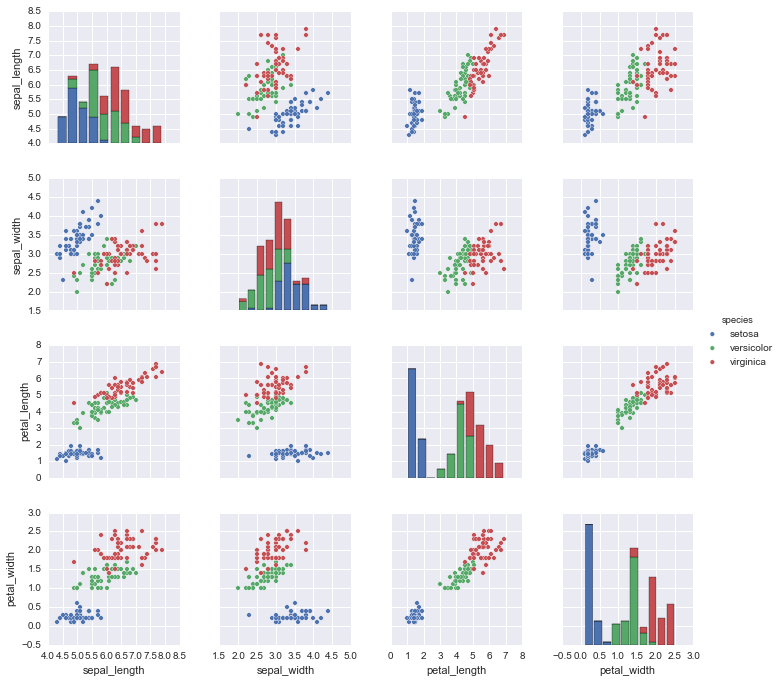

In [142]:
sns.pairplot(df, hue="species", size=2.5);

### Splitting into Training / Test set

There's a couple of ways to do this. There's no reason not to use the built-in method provided by SciKit-Learn, but I want to show you how to do it manually so you (1) known what's going on behind the scene (2) learn a little bit more about python modules and computational thinking

In [25]:
df.ix[105:,-1].value_counts()

virginica    45
dtype: int64

In [27]:
# Create the training (and test) set using the Random Number Generator

# select 70% as training dataset
n = int(len(y) * .7)

In [28]:
np.ones(n)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [32]:
type(np.ones(n))

numpy.ndarray

In [38]:
np.r_[np.ones(n),np.zeros(n)].astype(bool)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [44]:
# Let's randomly sample rows to include in our training data-set.
# r_ is a short form for concatenate
idx = np.r_[np.ones(n), np.zeros(len(y) - n)].astype(bool)
# Shuffle the index
np.random.shuffle(idx)

In [51]:
np.random.uniform(0, 1, len(y))

array([ 0.4885944 ,  0.33743489,  0.13936335,  0.59009569,  0.9995085 ,
        0.96301966,  0.02305975,  0.52987325,  0.01447549,  0.98292754,
        0.88968633,  0.20662771,  0.90932334,  0.26834305,  0.36010154,
        0.98074381,  0.18903323,  0.02752907,  0.77970296,  0.41411467,
        0.19347312,  0.57146954,  0.7107592 ,  0.18668733,  0.38898426,
        0.76087923,  0.07779355,  0.5329635 ,  0.5500118 ,  0.7712221 ,
        0.81858621,  0.41974643,  0.89188084,  0.13516213,  0.51119584,
        0.41099493,  0.53795343,  0.19956516,  0.22259889,  0.34936613,
        0.0767282 ,  0.31515826,  0.47883304,  0.63656599,  0.56315776,
        0.63646631,  0.26164429,  0.45794783,  0.68933775,  0.89648951,
        0.81114239,  0.91851075,  0.56432397,  0.45217222,  0.33264242,
        0.95856482,  0.66714258,  0.7149858 ,  0.00339385,  0.70289569,
        0.63514188,  0.95000241,  0.53637196,  0.99947963,  0.32635538,
        0.53749472,  0.26000903,  0.12512476,  0.51282253,  0.56

In [45]:
# Or more concisely
idx = np.random.uniform(0, 1, len(y)) >= 0.3

In [ ]:
# Or by using the `Jason method`
idex = list(df.index)
np.random.shuffle(idex)
df.ix[idex[:105],:]

In [46]:
X_train, X_test = X[idx], X[idx==False]
y_train, y_test = y[idx], y[idx==False]

In [76]:
# Or by using the built-in method from SciKit-Learn
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                        test_size=0.30,
                                        random_state=10)

In [77]:
# Let's test various values of K
n_neighbors = range(1,51,2)

In [78]:
# Loop through each neighbors value from 1 to 51 and append
# the scores
scores = []
for n in n_neighbors:
    clf = KNN(n)
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

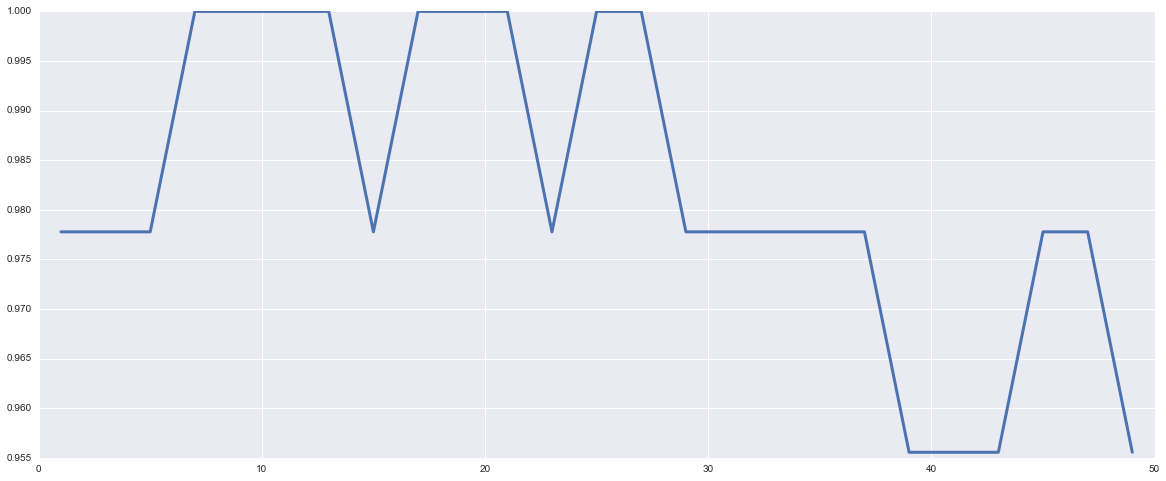

In [79]:
plt.figure(figsize=(20,8))
plt.plot(n_neighbors, scores, linewidth=3.0)
plt.show()

### Application of Cross Validation

The work above shows that at 11 neighbors, we can get an ideal result that doesn't overfit the data. To verify this, we'll use cross validation.

In [65]:
scores = []
idx = np.random.uniform(0, 1, len(X)) >= 0.3
for n in range(5):
    np.random.shuffle(idx)
    X_train, X_test = X[idx], X[idx == False]
    y_train, y_test = y[idx], y[idx == False]
    clf = KNN(11, weights='uniform')
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

In [66]:
scores

[0.97142857142857142,
 1.0,
 0.94285714285714284,
 0.97142857142857142,
 0.97142857142857142]

In [139]:
np.mean(scores)

0.96111111111111103

### Simplifying the Model

To showcase our whole model's performance, we can plot our algorithm against the two most significant features available in this data set.

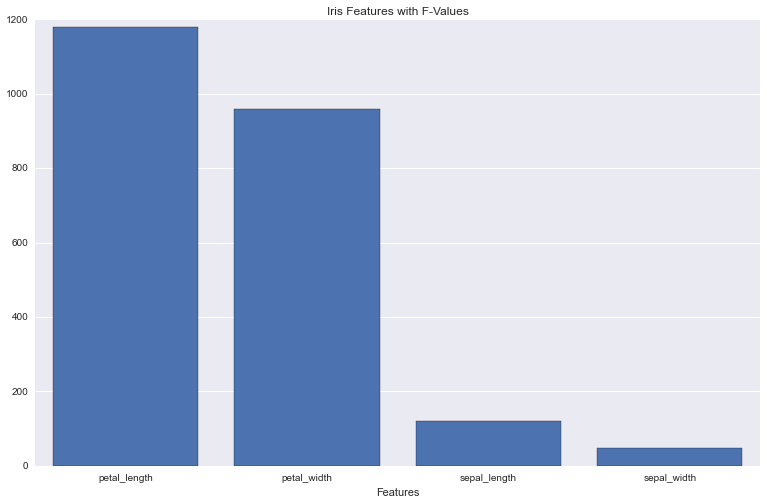

In [199]:
# Let's figure out what our most powerful features are.

F = feature_selection.f_classif(X, y)[0]
title = 'Iris Features with F-Values'

plt.figure(figsize=(13, 8))
ax = sns.barplot(x=df.columns[:-1],y=F)
ax.set_title(title)
ax.set(xlabel="Features");

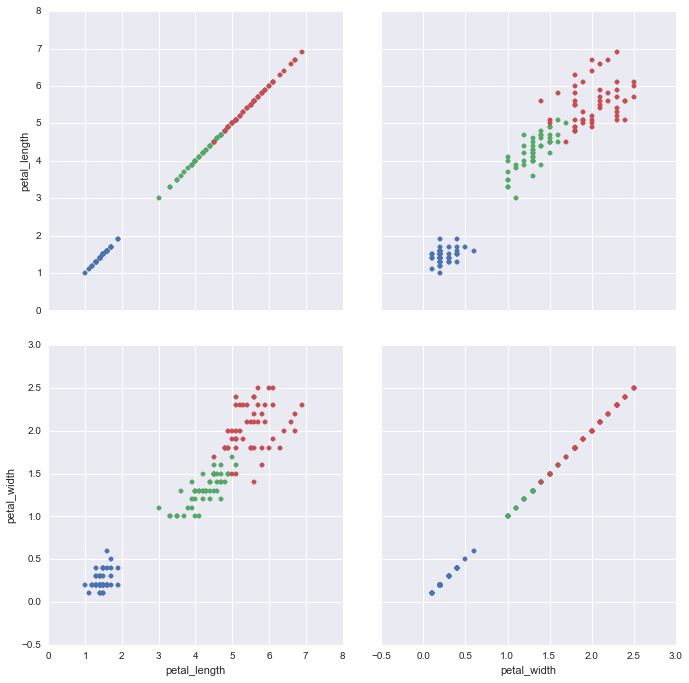

In [217]:
g = sns.PairGrid(df, vars=["petal_length", "petal_width"],
                 hue="species", aspect=1, size=5)
g.map(plt.scatter)

### Visualising the Decision Boundaries

In [250]:
h = .02  # step size in the mesh

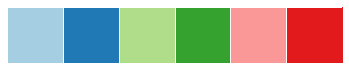

In [269]:
# Create color maps
col_map = sns.color_palette("Paired")
sns.palplot(col_map)
cmap_light = ListedColormap(['#A6CEE3', '#AFDD8A', '#FA9897'])
cmap_bold = ListedColormap(['#2078B4', '#35A12E', '#E31A1C'])

In [311]:
X_ = X.ix[:, 2:].values

In [87]:
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
5         setosa
6         setosa
7         setosa
8         setosa
9         setosa
         ...    
140    virginica
141    virginica
142    virginica
143    virginica
144    virginica
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, dtype: object

In [88]:
# instead of numers, lets' encode them as numbers
a = list(y.unique())

In [89]:
a

['setosa', 'versicolor', 'virginica']

In [90]:
y_ = [a.index(v) for v in y]

In [91]:
y_

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [313]:
clf = KNN(11, weights='uniform')
clf.fit(X_, y_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=11, p=2, weights='uniform')

In [314]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]*[y_min, y_max].
x_min, x_max = X_[:, 0].min() - 1, X_[:, 0].max() + 1
y_min, y_max = X_[:, 1].min() - 1, X_[:, 1].max() + 1

In [315]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

In [316]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)

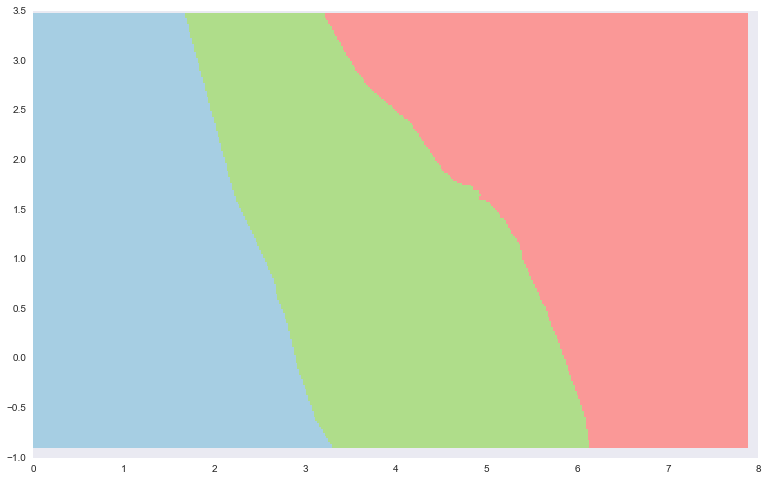

In [339]:
# from matplotlib.pyplot import pcolormesh
plt.figure(figsize=(13,8))
pcolormesh(xx, yy, Z, cmap=cmap_light);

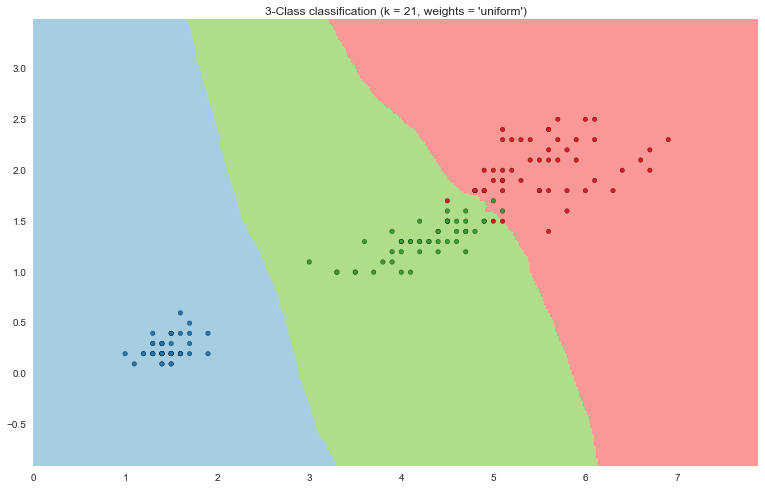

In [338]:
# Plot also the training points
plt.figure(figsize=(13,8))
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_[:, 0], X_[:, 1], c=y_, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
         % (21, 'uniform'));

![break](assets/mountain.png)

## Discussion

1. What are some potential setbacks or pitfalls to the KNN algorithm?
2. What are some potential implementation changes to the algorithm that could be made to get around these pitfalls?

* What if features aren't same units?
* What if the data isn't normalised?
* What if one feature is more important than the other?

## Getting around the Gotchas!

### Normalisation

In [342]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [344]:
"""
Normalise a dataframe, centered around 0
"""

X_norm = (X - X.mean()) / (X.max() - X.min())

In [345]:
X_norm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.206481,0.184444,-0.399661,-0.416389
1,-0.262037,-0.023889,-0.399661,-0.416389
2,-0.317593,0.059444,-0.416610,-0.416389
3,-0.345370,0.017778,-0.382712,-0.416389
4,-0.234259,0.226111,-0.399661,-0.416389


In [346]:
X_norm.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-3.671137e-16,-3.256654e-16,-4.263256e-16,-2.842171e-16
std,2.300184e-01,1.816110e-01,2.992031e-01,3.175990e-01
min,-4.287037e-01,-4.405556e-01,-4.674576e-01,-4.580556e-01
25%,-2.064815e-01,-1.072222e-01,-3.657627e-01,-3.747222e-01
50%,-1.203704e-02,-2.388889e-02,1.003390e-01,4.194444e-02
75%,1.546296e-01,1.011111e-01,2.274576e-01,2.502778e-01
max,5.712963e-01,5.594444e-01,5.325424e-01,5.419444e-01


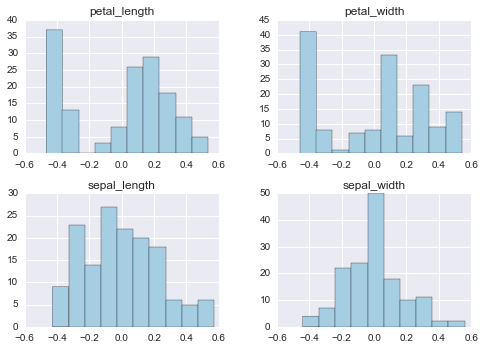

In [350]:
# plt.figure(figsize=(13,8))
X_norm.hist();

In [354]:
"""
Standardise a set of columns in a dataframe, between 0 and 1
"""

X_standard = (X - X.min()) / (X.max() - X.min())

In [355]:
X_standard.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [356]:
X_standard.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


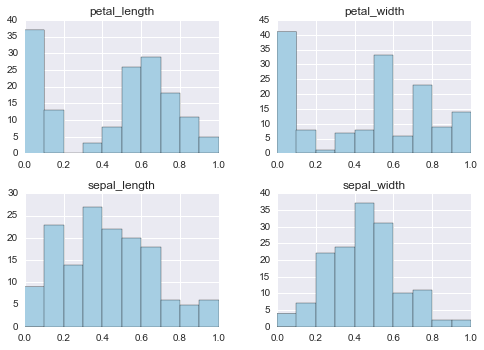

In [357]:
X_standard.hist();

In [361]:
X.columns

Index([u'sepal_length', u'sepal_width', u'petal_length', u'petal_width'], dtype='object')

In [363]:
"""
Weight a set of columns in a dataframe, by 2 and 1/2
"""
X_weighted = pd.DataFrame.join(X_norm.ix[:,:2] * 2, X_norm.ix[:,2:] / 2)

In [364]:
X_weighted.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.444444,1.250000,0.033898,0.020833
1,0.333333,0.833333,0.033898,0.020833
2,0.222222,1.000000,0.025424,0.020833
3,0.166667,0.916667,0.042373,0.020833
4,0.388889,1.333333,0.033898,0.020833


In [365]:
X_weighted.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,0.857407,0.881111,0.233729,0.229028
std,0.460037,0.363222,0.149602,0.158800
min,0.000000,0.000000,0.000000,0.000000
25%,0.444444,0.666667,0.050847,0.041667
50%,0.833333,0.833333,0.283898,0.250000
75%,1.166667,1.083333,0.347458,0.354167
max,2.000000,2.000000,0.500000,0.500000


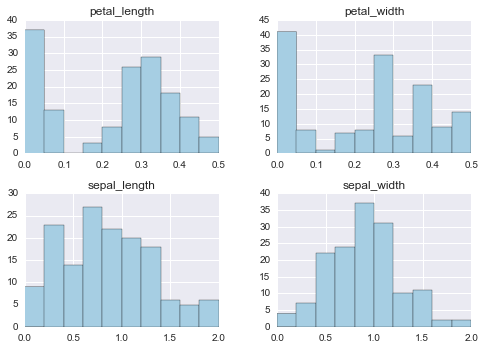

In [367]:
X_weighted.hist();

#### Parallel Coordinates

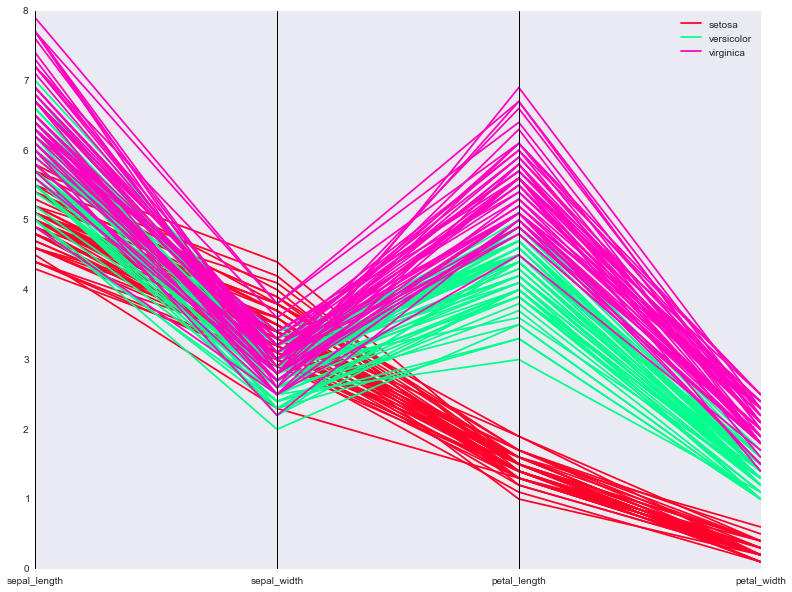

In [376]:
from pandas.tools.plotting import parallel_coordinates
"""
Parallel Coordinates plot of the Iris Dataset
"""

plt.figure(figsize=(13,10))
parallel_coordinates(df, 'species', colormap='gist_rainbow');

### Things to consider with KNN

The KNN results basically depend on 3 things (except for the value of K):


* **Density of your training data**: you should have roughly the same number of samples for each class. Doesn't need to be exact, but I'd say not more than 10% disparity. Otherwise the boundaries will be very fuzzy.
* **Size of your whole training set**: you need to have sufficiently enough examples in your training set so your model can generalize to unknown samples.
* **Noise**: KNN is very sensitive to noise by nature, so you want to avoid noise in your training set as much as possible.


Consider the following example where you're trying to learn a donut-like shape in a 2D space.

By having a different density in your training data (let's say you have more training samples inside of the donut than outside), your decision boundary will be biased like below:

![](assets/9Zx5n.png)

On the other hand, if your classes are relatively balanced, you'll get a much finer decision boundary that will be close to the actual shape of the donut:

![](assets/LPhwn.png)

So it is better to first balance your classes before running KNN. Also take the other 2 points in consideration and you should be fine.

### Sampling Strategy

An example would be to take a random sample of the majority class so that it is limited to the same size as the minority class. More advanced sampling strategies will be covered later. 

In [11]:
# generate some random data
import pandas as pd
import numpy as np
import random
df = pd.DataFrame(np.random.randn(100, 4), columns=['A','B','C','Durian'])

In [12]:
# create label
y = np.concatenate([np.ones(30),np.zeros(70)])
df['y'] = y

In [13]:
df.head()

,A,B,C,Durian,y
0,0.193759,-1.517000,0.011861,0.143386,1
1,2.224123,-1.314217,0.061596,-1.150379,1
2,-1.355539,-0.754151,1.250395,-0.411200,1
3,-1.858300,-0.720079,-0.357004,-2.009005,1
4,0.854498,-0.082226,-0.500532,1.089492,1


In [14]:
# check distribution of classes
df.y.value_counts()

0    70
1    30
dtype: int64

In [15]:
# limit the class size to the smallest class
n = min(df.y.value_counts())
n

30

In [80]:
# what's the majority class?
max_class = int(df.y.value_counts().idxmax())
max_class

1

In [110]:
# random sample the rows from the majority class up 
# to the size of the minority class.
max_rows = random.sample(df[df.y == max_class].index, n)
len(max_rows)

30

In [109]:
# what's the minority class?
min_class = int(df.y.value_counts().idxmin())
min_class

0

In [119]:
# select all the rows of the minority class
min_rows = df[df.y == min_class].index
len(min_rows)

30

In [117]:
# combine the rows from both classes
rows = np.r_[min_rows, max_rows]
len(rows)

60

In [106]:
# Finally we have a dataset with balances classes
df.ix[rows,'y'].value_counts()

1    30
0    30
dtype: int64

![break](assets/voronoi.png)

## Conclusion

#### Advantages

* Very simple implementation.
* Robust with regard to the search space; for instance, classes don't have to be linearly separable.
* Classifier can be updated online at very little cost as new instances with known classes are presented.
* Few parameters to tune: distance metric and k.

#### Disadvantages

* Expensive testing of each instance, as we need to compute its distance to all known instances. Specialized algorithms and heuristics exist for specific problems and distance functions, which can mitigate this issue. This is problematic for datasets with a large number of attributes. When the number of instances is much larger than the number of attributes, a R-tree or a kd-tree can be used to store instances, allowing for fast exact neighbor identification.
* Sensitiveness to noisy or irrelevant attributes, which can result in less meaningful distance numbers. Scaling and/or feature selection are typically used in combination with kNN to mitigate this issue.
* Sensitiveness to very unbalanced datasets, where most entities belong to one or a few classes, and infrequent classes are therefore often dominated in most neighborhoods. This can be alleviated through balanced sampling of the more popular classes in the training stage, possibly coupled with ensembles.

![break](assets/voronoi.png)

### Homework

* Build a nested loop, where the outer loop iterates through values of K, and the inner loop crossvalidates the score.

* Compare how the various features and combinations of features perform. Use the code you built for the previous  point.

Using the [skin segmentation dataset](http://archive.ics.uci.edu/ml/datasets/Skin+Segmentation) build a KNN model which uses training and testing data with and cross validates the model!

* Load the Data
* Clean the Data
* EDA
* Cross Validation
* Perform KNN

![break](assets/resources.png)

## Resources

#### Articles

* [KNN in Simple Terms](http://www.jiaaro.com/KNN-for-humans/)
* [Should I normalize/standardize/rescale?](http://www.faqs.org/faqs/ai-faq/neural-nets/part2/section-16.html)
* [Mahalanobis distance](http://en.wikipedia.org/wiki/Mahalanobis_distance)

#### Tools

* [KNN Algorythms in SciKit Learn](http://scikit-learn.org/stable/modules/neighbors.html)
* [Datasets provided by SciKit Learn](http://scikit-learn.org/stable/datasets/)
* [Matplotlib Colormaps](http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps)
* [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)


#### Code

* [Intuitive Classification using KNN and Python](http://blog.yhathq.com/posts/classification-using-knn-and-python.html)
